#### [PREV](2.OOP_Multi_Feature_Linear_Regression.ipynb) | [HOME](../README.md) | [NEXT](4.OOP_Logistic_Regression.ipynb)

---

# OOP Polynomial Linear Regression Implementation

This Jupyter Notebook provides a basic implementation of Polynomial Linear Regression. The data set contains measurements on a single species of insect captured on two continents. We want to predict an insects wing size given the other measurements we have.

#### Step 1 - Import Dependencies

In [ ]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error,mean_squared_error 

#### Step 2 - Import And Visualise The Data

In [ ]:
#Import data as a Pandas DataFrame
insects = pd.read_csv('./data/SoldBasedOnPrice.csv', sep='\t')
insects = pd.DataFrame({
    'Reviews': insects['Review/5'],
    'Price': insects['Price'],
    'Total Sold': insects['TotalSold(Thousdands)'],
    'Year Of Release': insects['YearOfRelease']
})

# Features variable
X_insects = insects[['Price', 'Total Sold', 'Year Of Release']]
# Target variable
y_insects = insects['Reviews']

insects.head()

,Reviews,Price,Total Sold,Year Of Release
0,4.5,40,3000000,2009
1,4.7,10,45000,2011
2,4.6,18,500000,1989
3,4.5,0,5000,2007
4,4.4,1,1000,2015


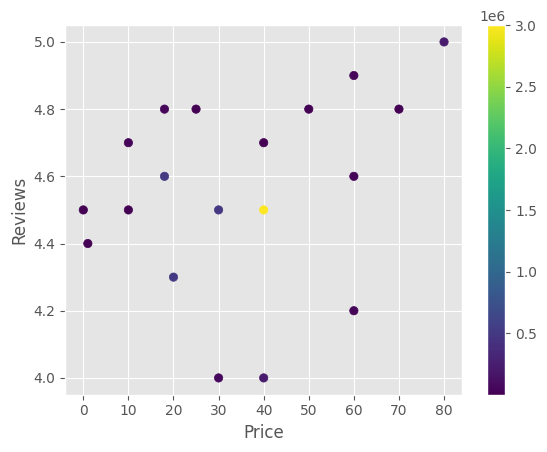

In [ ]:
# Plot the data, colour coded by sex
ax = plt.scatter(insects.Price, insects.Reviews, c=insects['Total Sold'])
plt.xlabel("Price")
plt.ylabel("Reviews")
plt.colorbar()
plt.show()

#### Step 3: Instantiate a LinearRegression Object

In [ ]:
insects_regression = LinearRegression()

#### Step 4: Fit the model

In [ ]:
# Instantiate a polynomial feature with 4 degrees
poly = PolynomialFeatures(degree=4, include_bias=True)

# Fit and transform the features
poly_features = poly.fit_transform(X_insects)

# Fit the regression model
insects_regression.fit(poly_features, y_insects)

LinearRegression()

#### Step 5: Predict Values

In [ ]:
# Predict the target for the whole dataset
wing_size_predictions = insects_regression.predict(poly_features)

#Predict the target for a new data point
new_insect = pd.DataFrame({
    'Price': [50],
    'Total Sold': [6440],
    'Year Of Release': [2013]
})
new_poly_features = poly.fit_transform(new_insect)
new_insect['Reviews'] = insects_regression.predict(new_poly_features)
print(f"New insect is:\n{new_insect}")

New insect is:
   Price  Total Sold  Year Of Release   Reviews
0     50        6440             2013  4.667371


#### Step 5: Plot the Predictions

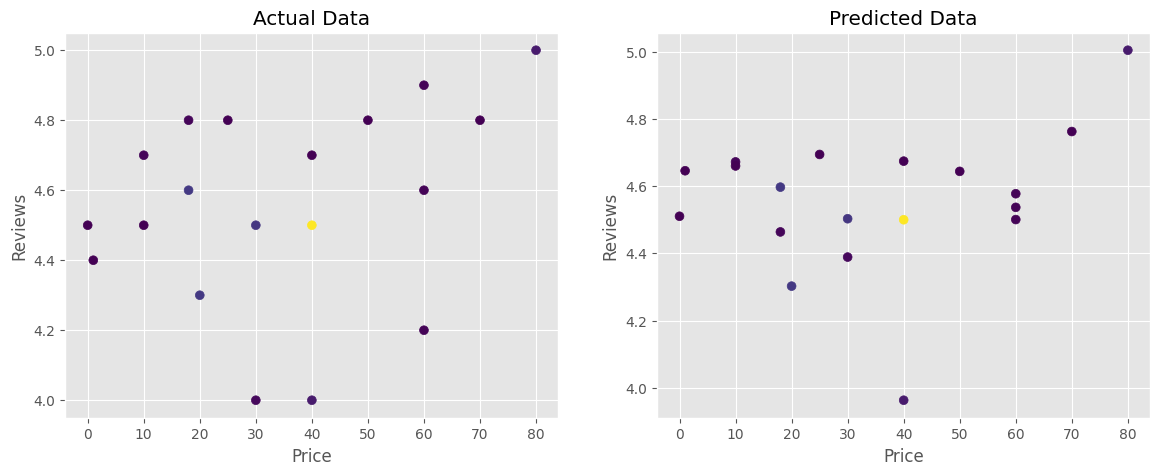

In [34]:
#Plot the predictions compared to the actual data
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].scatter(insects.Price, insects.Reviews, c=insects['Total Sold'],  s=40)
axs[0].set_title("Actual Data")
axs[0].set_xlabel("Price")
axs[0].set_ylabel("Reviews")


axs[1].scatter(insects.Price, wing_size_predictions, c=insects['Total Sold'], s=40)
axs[1].set_title("Predicted Data")
axs[1].set_xlabel("Price")
axs[1].set_ylabel("Reviews")

plt.show()

#### Step 6: Evaluate The Model

In [35]:
#Get Evalutative Data from the model
print(f"Model coefficient :{insects_regression.coef_}")
print(f"Model y intercept :{insects_regression.intercept_}")

mae = mean_absolute_error(y_true=y_insects,y_pred=wing_size_predictions) 
mse = mean_squared_error(y_true=y_insects,y_pred=wing_size_predictions)
print("MAE:",mae) 
print("MSE:",mse) 

Model coefficient :[ 4.43134776e-17  2.86579778e-22 -3.17217142e-23  2.76508419e-24
  7.54397304e-22  3.28670236e-20  2.27037005e-20 -9.38214503e-19
 -4.28513126e-20  1.07507086e-20  5.03319240e-20  4.52368938e-18
  1.52642741e-18 -4.73624870e-17  6.74860772e-17  4.59476016e-17
 -1.02181080e-16 -9.46992138e-16 -4.41335510e-17  3.24889204e-17
  3.35008646e-18  3.65160551e-16  1.01829051e-16  1.57278825e-13
  9.17973221e-15  3.08852472e-15  3.98123034e-17 -1.46520603e-14
  1.38518040e-13  9.29879589e-14 -1.40854119e-23 -7.25108218e-19
  2.37239010e-16 -4.15878227e-15  8.72737549e-14]
Model y intercept :3.238753657810796
MAE: 0.12121426455815697
MSE: 0.03493740248086949


In [36]:
#Optional: Manually Evaluate the loss and cost of the model
model_loss = pd.DataFrame({
    'Target': y_insects,
    'Predicted result': wing_size_predictions,
    'Loss': abs(insects_regression.predict(poly_features).round(2) - y_insects)**2
})
model_cost = 1 / (2 * model_loss.shape[0]) * model_loss['Loss'].sum()

print(f"The cost of this model is {model_cost:.5f}")
print(model_loss)

The cost of this model is 0.01775
    Target  Predicted result    Loss
0      4.5          4.499999  0.0000
1      4.7          4.672013  0.0009
2      4.6          4.596955  0.0000
3      4.5          4.510329  0.0001
4      4.4          4.645728  0.0625
5      4.3          4.302461  0.0000
6      4.8          4.463758  0.1156
7      4.9          4.500515  0.1600
8      5.0          5.004261  0.0000
9      4.0          3.963066  0.0016
10     4.0          4.388912  0.1521
11     4.5          4.502978  0.0000
12     4.6          4.577376  0.0004
13     4.8          4.643890  0.0256
14     4.5          4.659995  0.0256
15     4.8          4.694187  0.0121
16     4.7          4.674300  0.0009
17     4.8          4.762405  0.0016
18     4.2          4.536870  0.1156
